<a href="https://colab.research.google.com/github/Rish-3/Ytube-nwp/blob/main/LRm5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LINEAR REGRESSION

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/notebook/Transformed_Housing_Data2(1).csv')

In [ ]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
sale_price=data['Sale_Price'].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'sale_price': sale_price,'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


<function matplotlib.pyplot.show(close=None, block=None)>

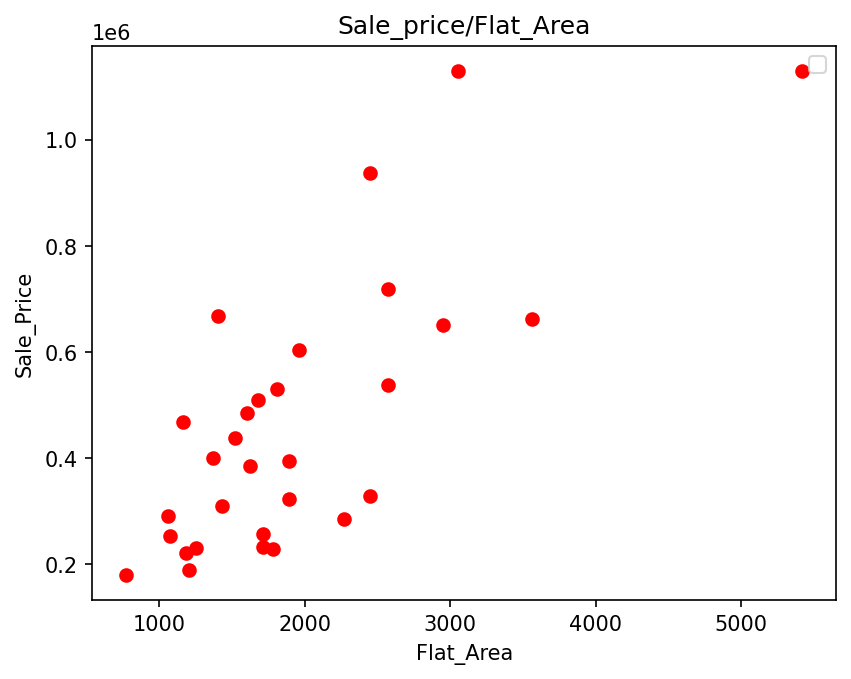

In [ ]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_price/Flat_Area')
plt.legend()
plt.show

building the mean regression model to predict the sale price of the new house

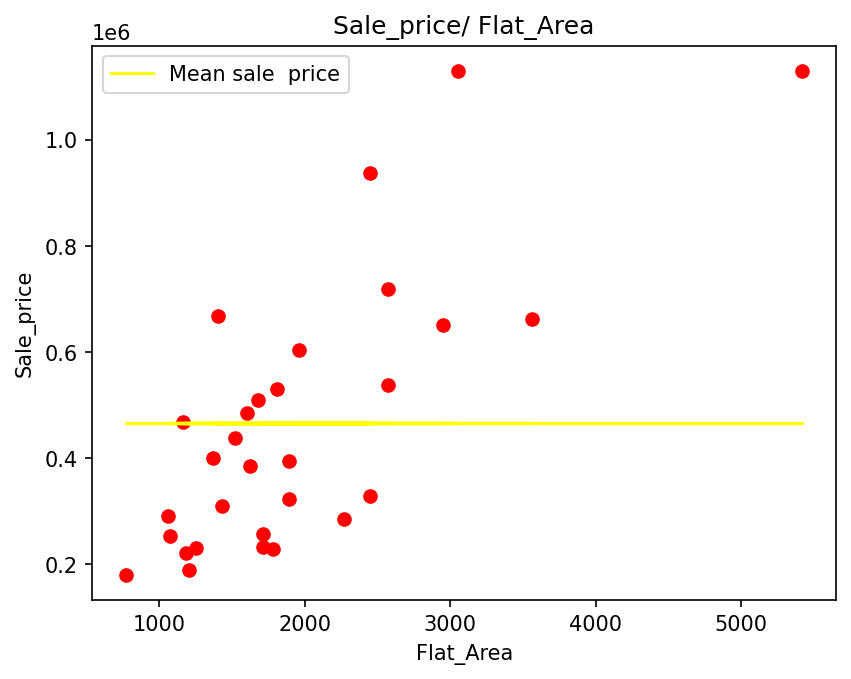

In [ ]:
sample_data['mean_sale_price']=sample_data.sale_price.mean()
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color='red')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color='yellow', label='Mean sale  price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_price')
plt.title('Sale_price/ Flat_Area')
plt.legend()
plt.show()


the mean regression model says that every new house listed would have the same price irrespective of the flat area which is not correct.
what can be a better way to predict the sale price based on the flat price based on the flat area.

linear regression model is the linear relationship between the dependent and independent variables.

# Explain what are the parameters of a linear regression model

y=mx+c

*   m and c are the parameter of the line
*   m is slope and c is intercept of line

*  as the value of c increase the line shift upwards but angle of line does not change
*   if increase the value of m and c is constant the rate at which the value Y increase with respect to x also increases.




# cost /loss function curve

Text(0.5, 1.0, 'slope0with MSE281372081125')

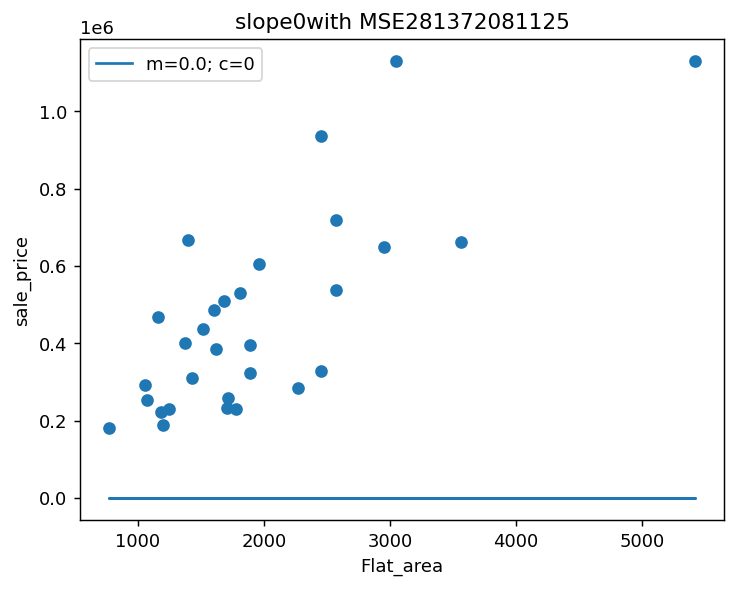

In [ ]:
c=0
m=0
line=[]
for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label= 'm=0.0; c=0')
plt.xlabel('Flat_area')
plt.ylabel('sale_price')
plt.legend()
MSE=281372081125
plt.title('slope'+str(m)+'with MSE' + str(MSE))

MSE is very large
the line models the data very poorly

In [ ]:
from sklearn.metrics import mean_squared_error
def slope_error(slope,intercept, sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    temp=sample_data.flat_area[i]*slope+intercept
    sale.append(temp)
  MSE=mean_squared_error(sample_data.sale_price, sale)
  return MSE


In [ ]:
slope = [i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
  cost = slope_error(slope=i, intercept=0, sample_data=sample_data)
  Cost.append(cost)

arrange dataframe

In [ ]:
Cost_table =pd.DataFrame({
    'slope' : slope,
    'Cost'  : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


# loss function curve and cost function

*   loss function curve is the error corresponding to different models
*   Li



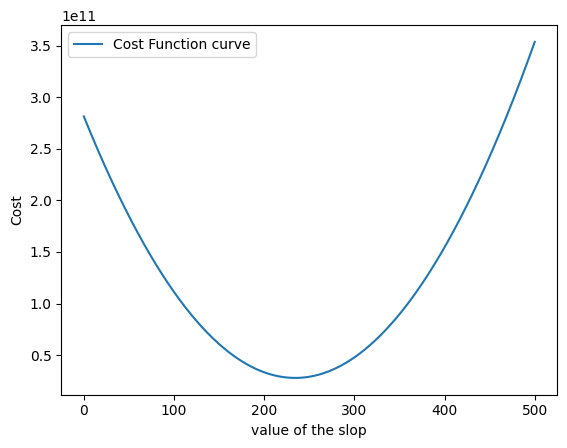

In [ ]:
# plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.slope, Cost_table.Cost, label='Cost Function curve')
plt.xlabel('value of the slop')
plt.ylabel('Cost')
plt.legend()


# convex and non convex curves

*   the cost function curve falls under the category of the convex curves. A minimum value at a certain point(global minimum)
*   non-convex curve does not have a single minimum another small region known as local minima



# using cost function curve to find parameters of linear regression model

*   how loss function curve can be used to find the parameters of the linear regression model.
*   Explain the need of the gradient descent algorithm.

*   does mean we have our best fit line or best linear regression model for this problem now?
*   can you imagine what the cost function curve would look like if we consider both m and the intercept c? you got 3 dimension figure.






In [ ]:
def intercept_error(slope, intercept, sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp=sample_data.flat_area[i]*slope +intercept
    sale.append(tmp)
  MSE=mean_squared_error(sample_data.sale_price, sale)
  return MSE

In [ ]:
intercept=[i for i in range(5000, 50000)]
Cost=[]
for i in intercept:
  cost = intercept_error(slope=234, intercept=i, sample_data=sample_data)
  Cost.append(cost)

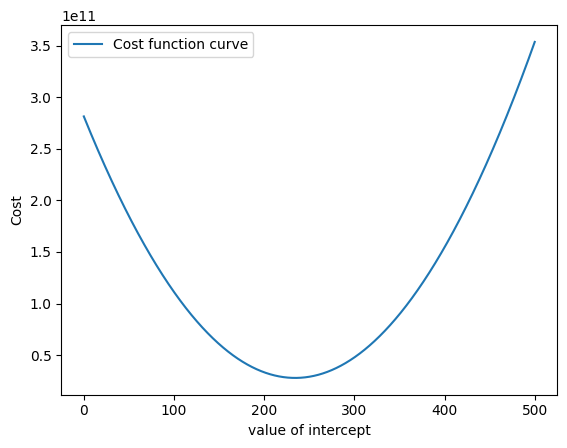

In [ ]:
# plotting the cost values corresponding to every value of beta
plt.plot(Cost_table.slope, Cost_table.Cost, label='Cost function curve')
plt.xlabel('value of intercept')
plt.ylabel('Cost')
plt.legend()


# Gradient Descent

gradient descent is an optimization algorithm that works iteratively and aims to find the minimum value of a convex function with respect to a set of parameters.

# steps involved in gradient descent algorithm

*   step1 :Random initialization = slope m = 0.1,intercept  c=mean of 'sale_price
*   step 2 : Generate predictions = eqn Y hat=mX+C where we have already initialised the value of m and c in the previous step.

1.   step3 : calculating the cost or mean square function=(y_hat-y)**2/n
cost function = (mx+C-y)**2/n . the cost function depends upon the slope m and intercept C.
2.   step 4 : update the parameters

*   mnew=mold-Zm and cnew = cold-Zc here we know that new parameter depend on old one and Zn and Zc is unknown.if Z is increase the parameter decrease or vice - versa. how to find the Z?
how would we known on which side the minimum costwe are on and what value should we takenfor Z. patial differentiate the cost function .
the sign of slope will always be the same as that of the desired value of ZM.





## implementing gradient in the python

# step 1 : initialization the parameter

In [ ]:
def param_init(Y): # this function takes only the target variable as its parameter.
  '''
  Y=target variable
  return initialized values of m and c
  '''
  # initialize the parameters
  m=0.1
  c=Y.mean()
  return m, c

# Step 2 : generate prediction

In [ ]:
def generate_predictions(m, c, X):
  '''
  X=independent variable
  return prediction generated by the line with parameter m and c
  '''
  prediction =[]
  for x in X:
    pred=(m*x)+c
    prediction.append(pred)
  return prediction

# Step 3: calculating the cost

In [ ]:
def compute_cost(prediction, Y):
  '''
  returns the mean_square_error between prediction and Y
  '''
  cost=np.sum(((prediction-Y)**2)/len(Y))
  return cost

# step 4: update the parameter

*   calculate the gradients . using the gradients to update the parameters m and c




In [ ]:
def gradients(prediction,Y,X):
  '''
  Return gradients corresponding to m and c
  '''
  n=len(Y)
  Gm=2/n* np.sum((prediction-Y)*X)
  Gc=2/n*np.sum((prediction-Y))
  return Gm, Gc

In [ ]:
# updating parameter using gradient
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
  '''
  update and return the new values of m and c
  '''
  m_new=m_old-alpha*Gm_old
  c_new=c_old-alpha*Gc_old
  return m_new, c_new

# step 5 : Result

In [ ]:
def result(m,c,X,Y,cost,predictions, i):
  '''
  print and plot  the final result obtained from gradient descent
  '''
  # if the gradient descent coverged to the optimum value before max_iter
  if i<max_iter-1:
    print("**** Gradient Descent has converged at iteration {}***".format(i))
  else:
    print("****Result after", max_iter,'iterations is :****')
    ## plotting the final result
    plt.figure(figsize=(14,7), dpi=120)
    plt.scatter(X,Y,color='red', label='data points')
    label='final regression line:m={}; c={}'.format(str(m), str(c))
    plt.plot(X,predictions, color='green',label=label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()


After Iteration  0 :m= 3499072.307222223 ;c= 465999.44299999997 ;cost= 64177937552.075005
After Iteration  20 :m= 7.115927055971628e+105 ;c= 2.997778392048355e+102 ;cost= 2.7417231010181384e+208
After Iteration  40 :m= 1.447154337383132e+205 ;c= 6.096532424296826e+201 ;cost= inf
After Iteration  60 :m= 2.9430538842431367e+304 ;c= 1.2398417341018387e+301 ;cost= inf
After Iteration  80 :m= nan ;c= nan ;cost= nan
After Iteration  100 :m= nan ;c= nan ;cost= nan
After Iteration  120 :m= nan ;c= nan ;cost= nan
After Iteration  140 :m= nan ;c= nan ;cost= nan
After Iteration  160 :m= nan ;c= nan ;cost= nan
After Iteration  180 :m= nan ;c= nan ;cost= nan
After Iteration  200 :m= nan ;c= nan ;cost= nan
After Iteration  220 :m= nan ;c= nan ;cost= nan
After Iteration  240 :m= nan ;c= nan ;cost= nan
After Iteration  260 :m= nan ;c= nan ;cost= nan
After Iteration  280 :m= nan ;c= nan ;cost= nan
After Iteration  300 :m= nan ;c= nan ;cost= nan
After Iteration  320 :m= nan ;c= nan ;cost= nan
After Iter

<ipython-input-23-c5a9897bde32>:5: RuntimeWarning: overflow encountered in square
  cost=np.sum(((prediction-Y)**2)/len(Y))
<ipython-input-45-2f73520bc155>:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_new -cost_old)<10**(-7):
<ipython-input-24-581b96cfecf2>:6: RuntimeWarning: overflow encountered in multiply
  Gm=2/n* np.sum((prediction-Y)*X)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-26-52c66328672b>:6: RuntimeWarning: invalid value encountered in double_scalars
  m_new=m_old-alpha*Gm_old
<ipython-input-26-52c66328672b>:7: RuntimeWarning: invalid value encountered in double_scalars
  c_new=c_old-alpha*Gc_old


After Iteration  360 :m= nan ;c= nan ;cost= nan
After Iteration  380 :m= nan ;c= nan ;cost= nan
After Iteration  400 :m= nan ;c= nan ;cost= nan
After Iteration  420 :m= nan ;c= nan ;cost= nan
After Iteration  440 :m= nan ;c= nan ;cost= nan
After Iteration  460 :m= nan ;c= nan ;cost= nan
After Iteration  480 :m= nan ;c= nan ;cost= nan
After Iteration  500 :m= nan ;c= nan ;cost= nan
After Iteration  520 :m= nan ;c= nan ;cost= nan
After Iteration  540 :m= nan ;c= nan ;cost= nan
After Iteration  560 :m= nan ;c= nan ;cost= nan
After Iteration  580 :m= nan ;c= nan ;cost= nan
After Iteration  600 :m= nan ;c= nan ;cost= nan
After Iteration  620 :m= nan ;c= nan ;cost= nan
After Iteration  640 :m= nan ;c= nan ;cost= nan
After Iteration  660 :m= nan ;c= nan ;cost= nan
After Iteration  680 :m= nan ;c= nan ;cost= nan
After Iteration  700 :m= nan ;c= nan ;cost= nan
After Iteration  720 :m= nan ;c= nan ;cost= nan
After Iteration  740 :m= nan ;c= nan ;cost= nan
After Iteration  760 :m= nan ;c= nan ;co

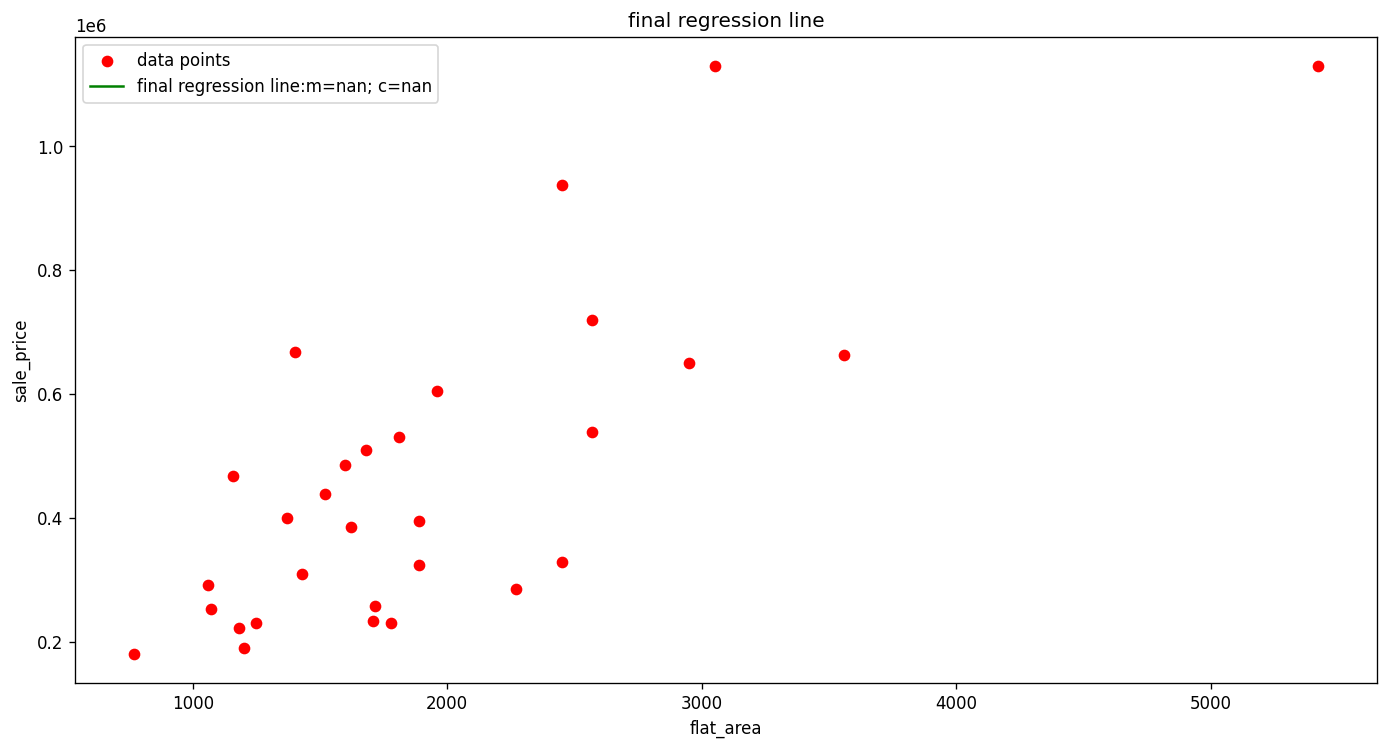

In [ ]:
# defining and reshaping the dataset
sale_price=sample_data['sale_price'].values.reshape(-1,1)
flat_area=sample_data['flat_area'].values.reshape(-1,1)

#declaring parameters
max_iter=1000
cost_old=0
alpha=0.01

# step1 : intializing the value of m and c
m,c=param_init(sale_price)

# gradient descent in action
for i in range(0, max_iter):

  # step2: generating predictions
  predictions= generate_predictions(m, c, flat_area)

  # step 3 calculating cost
  cost_new=compute_cost(predictions, sale_price)

  # checking if GD coverged
  if abs(cost_new -cost_old)<10**(-7):
    break

    # calculate the gradients
  Gm, Gc=gradients(predictions, sale_price, flat_area)

    # step 4 : updating parameter m and c
  m, c = param_update(m,c,Gm,Gc,alpha)

    #display the result after every 10 iterations
  if i%20==0:
    print('After Iteration ',i,':m=',m,';c=',c,';cost=', cost_new)

  # updating cost_old
  cost_old=cost_new

  # final results
result(m, c, flat_area, sale_price, cost_new, predictions,i )




****Result after 1000 iterations is :****


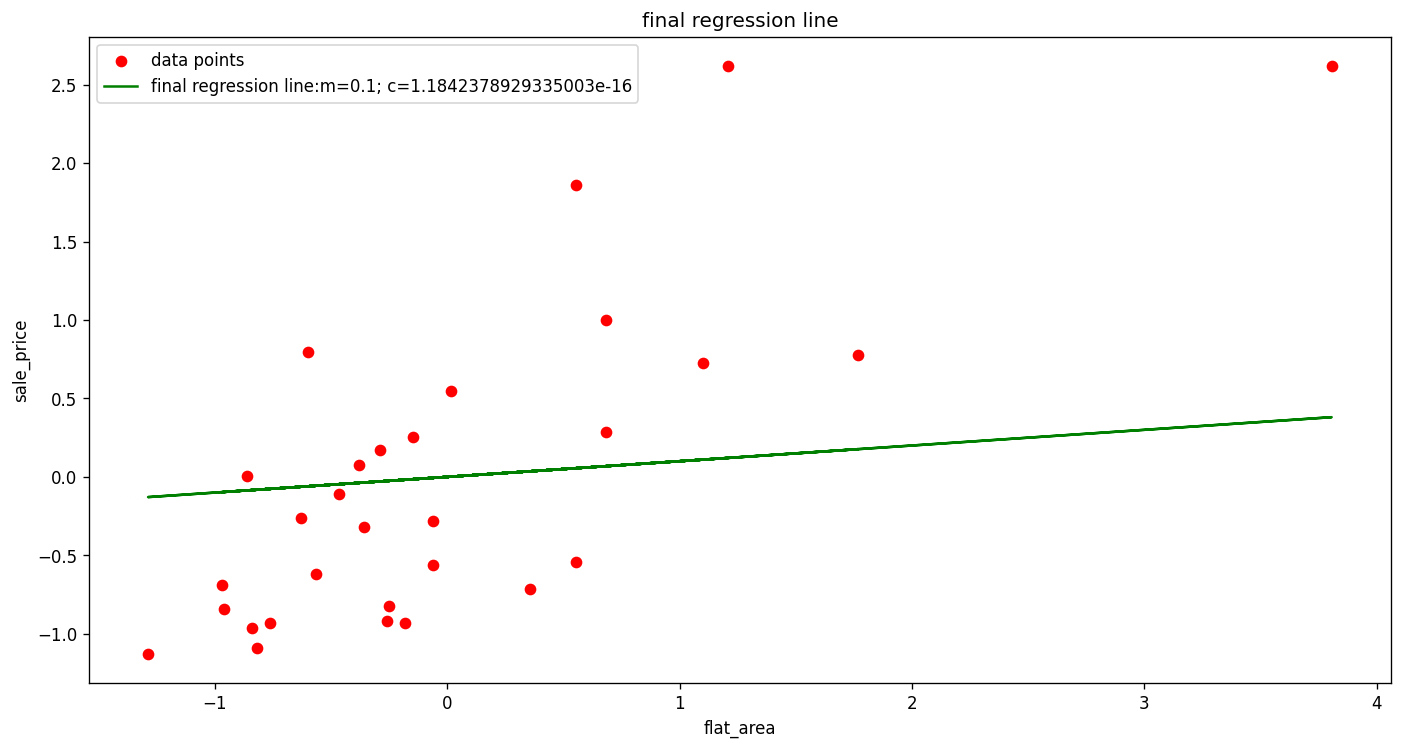

In [ ]:
# scaling the dataset using the tandard scaler
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
sale_price=scalar.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area=scalar.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

# declaring the parameters
max_iter=1000
cost_old=0
alpha=0.01

# step 1 initializing the value of the m and c
m,c = param_init(sale_price)

# gradient descent in action
for i in range(0, max_iter):

  # step 2 generating predictions
  predictions=generate_predictions(m, c, flat_area)

  # step 3 calculating the cost
  cost_new=compute_cost(predictions, sale_price)

  # checking if GD is converged
  if abs(cost_new-cost_old) < 10**(-7):
    break

    # calculating gradients
    Gm,Gc =gradients(predictions, sale_price, flat_area)

    # step 4: updating parameter m and c
    m,c=param_update(m, c, Gm, Gc, alpha)

    # display result after every 20 iterations
    if i%20==0:
      print('After Iteration',i,':m=', m,'; c=',c, '; cost=', cost_new)

      # updating cost_old
      cost_old= cost_new

 # final results
result(m,c,flat_area, sale_price, cost_new, predictions, i)



# linear Regression ASSuption  

some thing wrong value of m and c is very large in magnitude

*   the tangent and the independent variable should have linear relation between them.
*   constant varience  error

*   normal distributed of error
*   no co-relation between error terms.

*   multicollinearity








VIF (varience inflation factor) use for

*   diagonsing collinearity / multiplecollinearlity
*   quantifying correlation between two independent variable



# STEP IN IMPLEMENTING LINEAR REGRESSION MODEL:-

*   importing the libraries and the dataset
*   checking for multicollinearity and remove it.

*   scaling the dataset
*   creating test and train partitions

*   implementing the linear regression model using sklearn library

*   generating the prediction model over the test set
*   evaluate the model


*   ploting the residusals

*   checking the assumption of the linear regression model
*   visualizing the coefficient to intercept the mpdel results







# TREATING THE MULTIPLECOLLINEATITY




import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/notebook/Transformed_Housing_Data2(1).csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# STEPS WE FOLLOW TO CREATE Transformed_housing_data

*   1.Exploring the target and the independent variables
*   2.treating the outliers and the missing values in independent and targer variables .
*   3.transform the categorical varibles into the numerical variable using dummy encoding.





# SCALING THE DATASET

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Y=data['Sale_Price'] # target
X=scaler.fit_transform(data.drop(columns=['Sale_Price'])) # independent
X=pd.DataFrame(data=X, columns=data.drop(columns=['Sale_Price']).columns) # scale into one dataframe esay to read
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


checking the correlation the independent variables using the x.corr function it give us the correlation between every possible pair of variables in our dataset.

# checking and removing the multicollinearity

In [ ]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


there is 30 * 30 and total correlation values

In [ ]:
# pair of the variables with correlated greater than 0.5
k=X.corr()
# list comprehension allows us to write simple loops and simple nested loops to
# form a list in a single line
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)



([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

i and j are two variables . the variable i and j takes every possible combination of the independent variables.

*   condition to store the final element
*   corr of pair > 0.5

*  32/2=16 pair are unique with correlation > 0.5






# TREATING THE MULTIPLECOLLINEARITY USING VIF

CALCULARTING VIF

*   importing variance_inflation_factor function from statistics model
*   calculating vif for ever column



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X

VIF=pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

here only 7 variables are correlated

REMOVING ONLY ONE VARIABLE FROM PAIR OF CORRELATED INDEPENDENT VARIABLES IS ENOUGH.

In [ ]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [ ]:
def MC_remover(data):

  vif =pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index= data.columns)
  if vif.max()>5:
    print(vif[vif==vif.max()].index[0], 'has been removed')
    data=data.drop(columns=[vif[vif==vif.max()].index[0]])
    return data
  else:
    print('No multicollinearity present anyone')
    return data

In [ ]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No multicollinearity present anyone
No multicollinearity present anyone
No multicollinearity present anyone
No multicollinearity present anyone
No multicollinearity present anyone


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Remaining columns

*   calculating  VIF for remaining columns
*   List item



In [ ]:
VIF=pd.Series([variance_inflation_factor(vif_data.values, i) for i in range (vif_data.shape[1])], index=vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

none of the remaing variables have the variables have the VIF value over 5

# TRAINING THE MODEL

*   builting the liner regression model using scikit learn
*   make predictions for the test dataset and evaluate model performance
 on test dataset.


train and test dataset

In [ ]:
X=vif_data
Y=data['Sale_Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.3, random_state=101)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

LINEAR REGRESSION

*   lr.fit() function implement the gradient descent and the complete procedure over the training data.
*    



In [ ]:
# implementing the linear regression using sklearn library
# @ sklearn library allows us to implement the linear regression model without having to write own code for gradient descent

In [ ]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train) #

LinearRegression()

In [ ]:
lr.coef_ # y=m0+m1x1+m2X2------mnxn this all are value of m1 and m2 .......so on
# since data is normalized its mean m0 = 0

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [ ]:
# generating the prediction over the test set
predictions=lr.predict(X_test)
lr.score(X_test, Y_test)
# score()function calculate the R2 value of the model

0.8461987715586199

# VARIFYING THE ASSUMPTION OF LINEAR REGRESSION



*   MAKING THE RESIDUAL PLOT TO VARIFY ASSUMPTIONS
*   arrange the residual value because no independent  variable was used while plotting the  



# 1. RESIDUALS

In [ ]:
residuals=predictions-Y_test
residual_table=pd.DataFrame({'residuals':residuals,'predictions':predictions })
residual_table=residual_table.sort_values(by='predictions')
#

In [ ]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

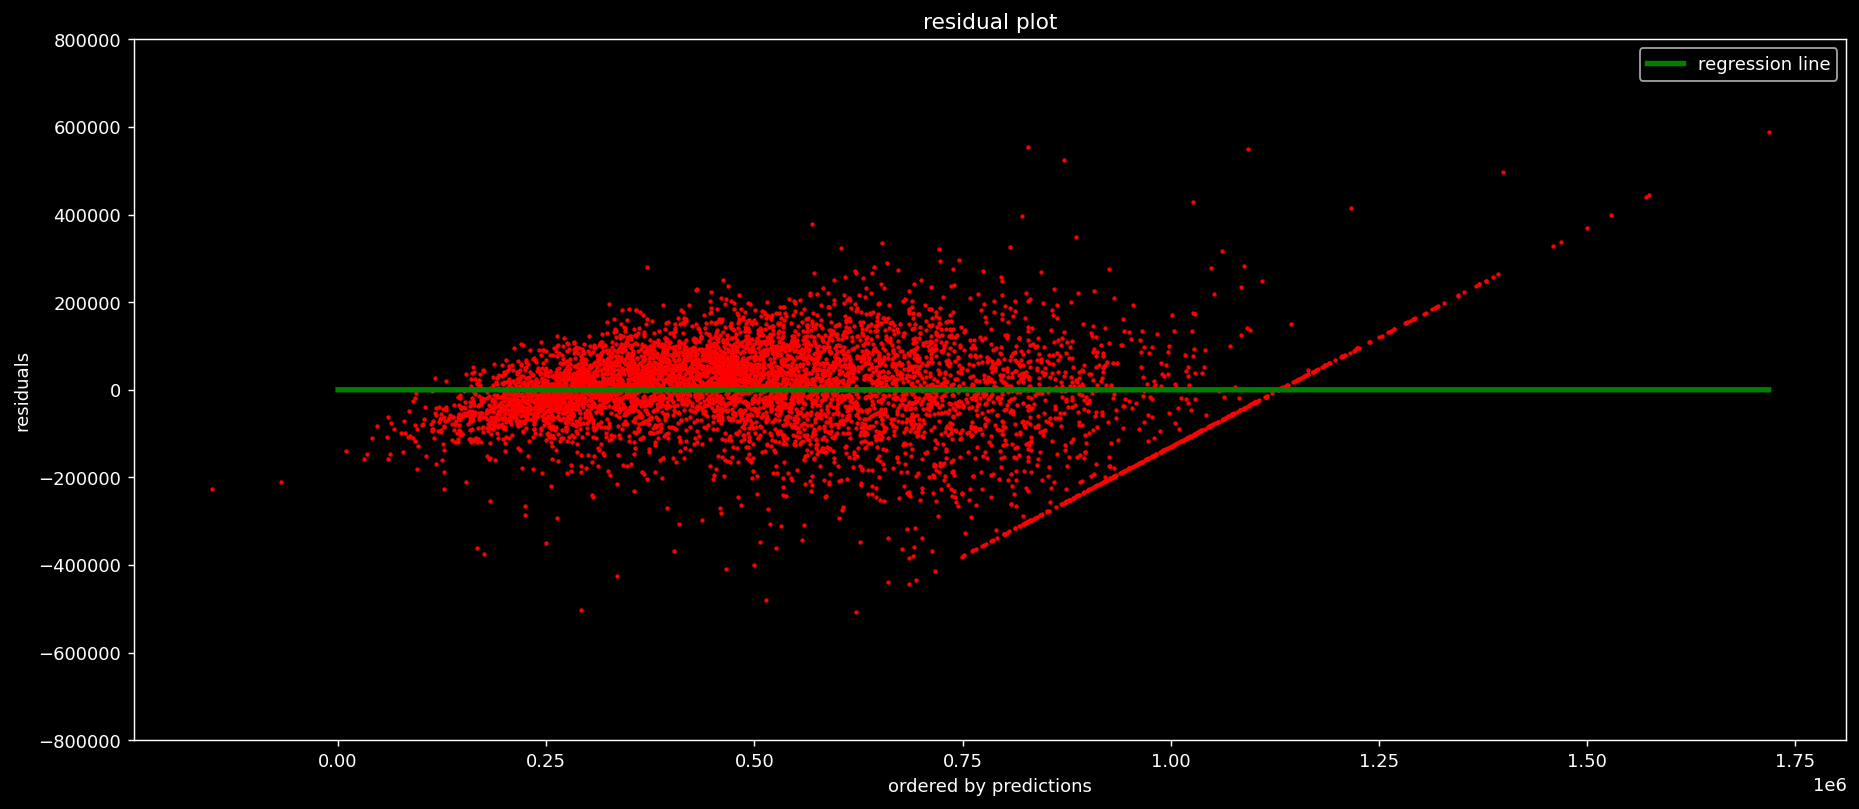

In [ ]:
plt.figure(dpi=130, figsize=(17,7))
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red', s=2)
plt.plot(z, k, color='green', linewidth=3, label='regression line')
plt.ylim(-800000, 800000)
plt.xlabel('ordered by predictions')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

the residuals are densely populated between the limits 200000 and -200000

*   there is the good probability that the residuals are normally distributed
*   the residual plot resembles neither the cone shape nor pipe shape

*   there is some scope of improvement in the data
*   there are some outliers with positive magnitude






# 2. DISTRIBUTION OF ERRORS

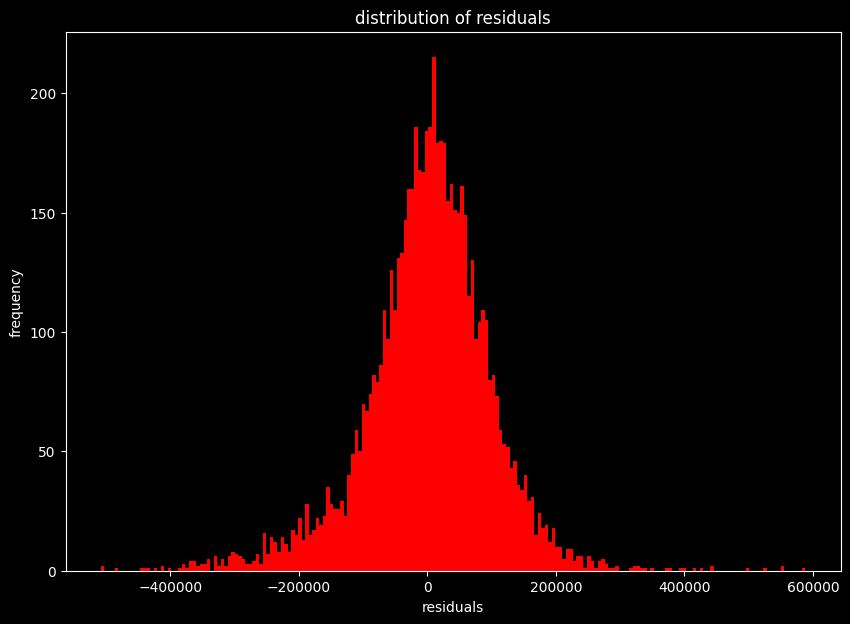

In [ ]:
plt.figure(dpi=100 ,figsize=(10,7))
plt.hist(residual_table['residuals'],color='red', bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()



*   the residual follow the normal distribution
*   magnitude of coefficient



# MODEL COEFFICIENTS

In [ ]:
coefficients_table=pd.DataFrame({'column': X_train.columns,
                                 'coefficients': lr.coef_})
coefficients_table=coefficients_table.sort_values(by='coefficients')

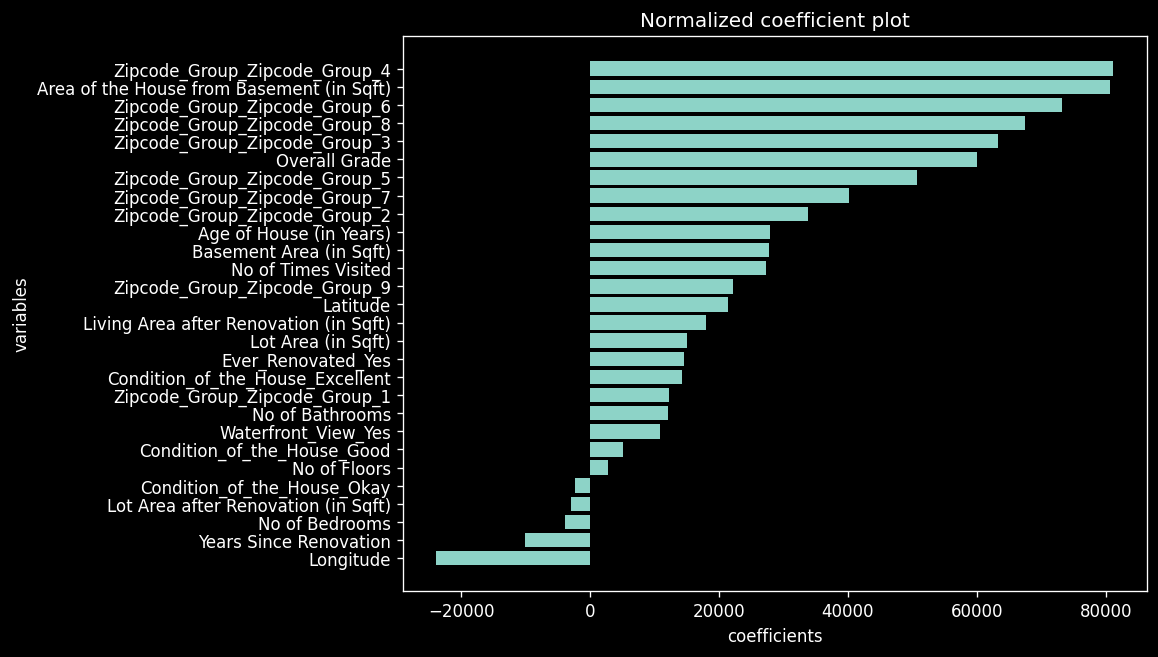

In [ ]:
plt.figure(figsize=(8,6), dpi=120)
x=coefficients_table['column']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('coefficients')
plt.ylabel('variables')
plt.title('Normalized coefficient plot')
plt.show()

the location plays a major role in the 'sale_price' of the house

*   The area of the house from basement play a major role in the 'sale_price' of the house.
*   the overall grade plays a major role in the sale price of the house.

*   the older houses are more expensive than newer ones
*   no of floors , no of bathroom, no. of bedroom etc these varables also played a sgnificant postive role

*   negatiive siignificance as the time from the last renovation of the house is increased, the price of the house is decreased
*   longitude negative significance  and latiitude posiitive significant ths data the house in the N-E region have relatively higher prices than other places







# key point

*   correlation coefficient tell us strength between two variables and direction of two variables.
*   correlation , scatter ,VIF method check multicollnearty

*   residual plot are the best method to check the normality of the error terms the pipe shaped residual plot indicates constant normality of error terms
*   the presence non-constant variance in the error terms results in heteroskeodasticity. generally non-costant varience arise because of  presence of outliers or extreme leverage values.





# Module 5.6
# FEATURE ENGINEERING
1.   The science of exteracting more information from existing data.
2.   Any new data is not added the data we already have is made more useful w.r.t problem in hand.



In [ ]:
data1=pd.read_csv('/content/NaN_Housing_Prices.csv')

In [ ]:
data1.head().shape

(5, 31)

In [ ]:
data1.isnull().sum()

Sale_Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
No of Times Visited                          19485
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                      13123
Age of House (in Years)                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (in Sqft)           0
Lot Area after Renovation (in Sqft)              0
Years Since Renovation                       20695
Condition_of_the_House_Excellent                 0
Condition_of_the_House_Fair                      0
Condition_of_the_House_Good                      0
Condition_of_the_House_Okay    

# two type feature engineerng
1. feature preprocessing
2. feature generation

# feature preprocessing


*   changing , update or transforming the exiistiing features




feature transformatiion : A method used to transform the features using mathematical operations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
data=pd.read_csv('/content/Raw_Housing_Prices3.csv') # no transformation with the independent variable has been done
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,None,...,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,None,...,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,None,...,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,None,...,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,None,...,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:
sum(data.isnull().sum())

0

# Feature transformation

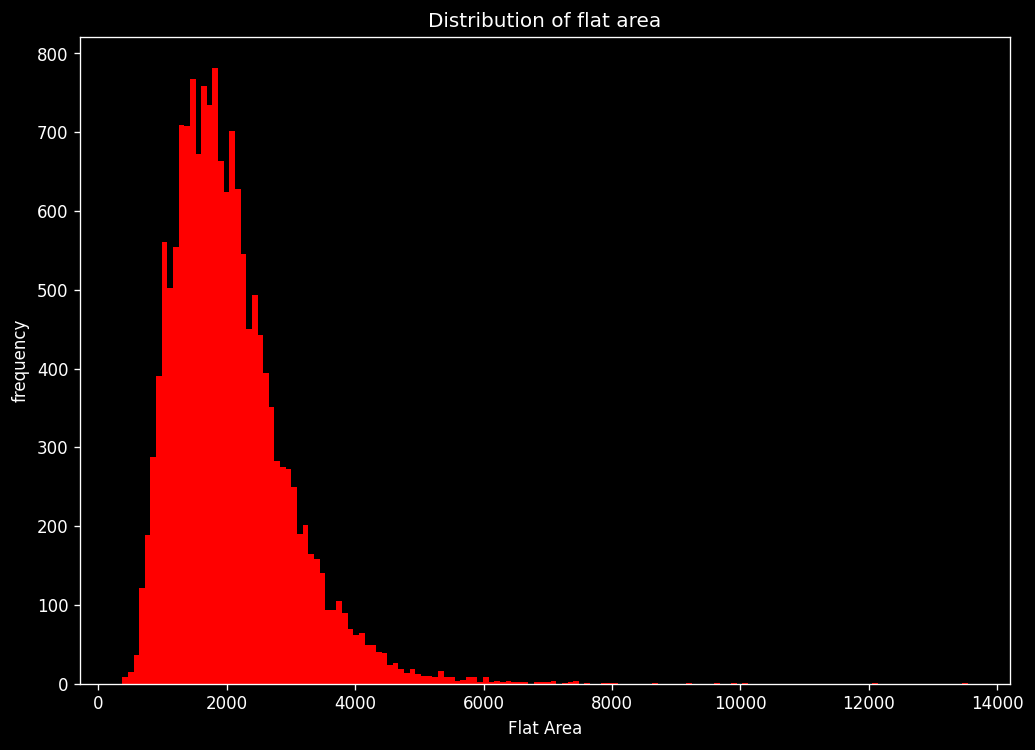

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
plt.hist(data['Flat Area (in Sqft)'], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of flat area')
plt.show()



*   the "flat area" is right skewed .




In [ ]:
def log_transform(sample_data):
  return np.log(sample_data)

In [ ]:
data['Transform flat Area']=data['Flat Area (in Sqft)'].map(log_transform)
# this convert the flat area value into log

Text(0.5, 1.0, 'Distribution of flat Area')

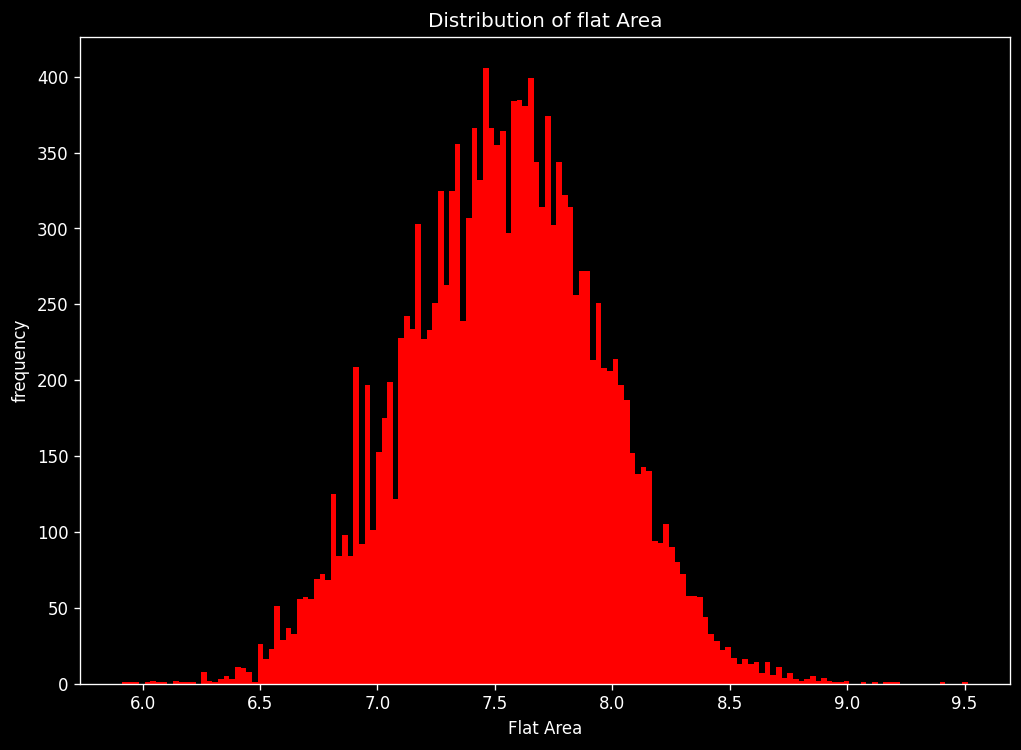

In [ ]:
plt.figure(figsize=(10,7), dpi=120)
plt.hist(data['Transform flat Area'], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of flat Area')



*   now flat area is normal distibution




# Feature transformation (categorical Encoding)
1.dummy encoding: create every level present in the categoriacal columns.
2.label encoding :to preserve the existing order among the different categories of the columns.
dummy encoding we already done good ,excellent,bad


THe order in the feature 'condition of the house' is as follows:
bad<okay<fair<good<excellent

*   bad=1 ,okay=2, fair=3, good=4, excellent=5

*   a new column for each level in our categorical variable can be avoided.

*   the dimensionality stay the same.
*   lebel encoding is used when the order among different level is known.








In [ ]:
label_encoded=data['Condition of the House']
label_encoded.value_counts()

Fair         9872
Good         4629
Excellent    1380
Okay          137
Bad            22
Name: Condition of the House, dtype: int64

In [ ]:
label_encoded = label_encoded.map({ 'Bad':1,
                                   'Okay':2,
                                   'Fair':3,
                                   'Good':4,
                                   'Excellent':5})

In [ ]:
label_encoded.value_counts()

Series([], Name: Condition of the House, dtype: int64)

# BINNING
is the process of aggregating data point in different categories to reduce the redundancy

In [ ]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay', nan], dtype=object)

In [ ]:
data['Condition of the House'].value_counts()

Good         9872
Excellent    1380
Okay          159
Name: Condition of the House, dtype: int64

In [ ]:
mean=[]

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House']==i].mean())

TypeError: ignored

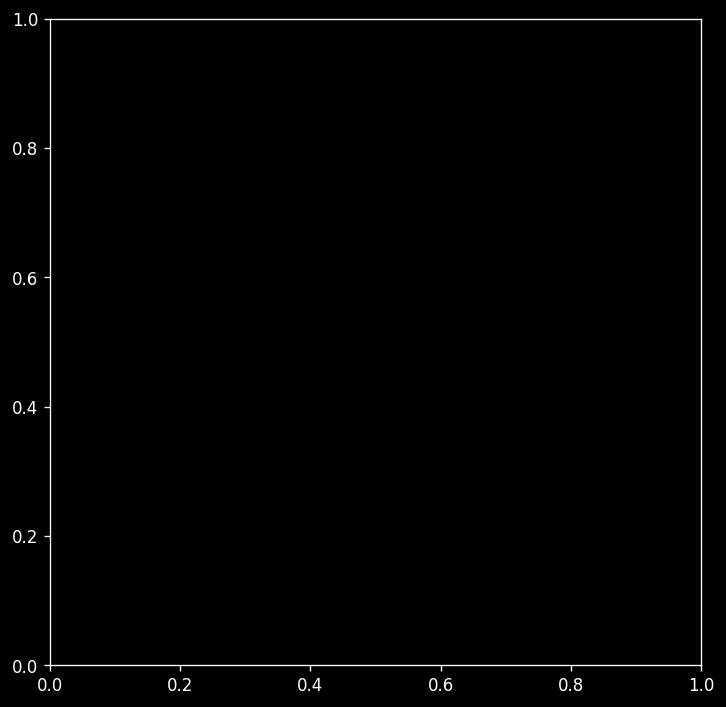

In [ ]:
plt.figure(figsize=(7,7), dpi=120)

plt.bar( data['Condition of the House'].unique(),mean)
plt.xlabel('Condition of the House')
plt.ylabel('mean sale price')


In [ ]:
mapping={'Excellent':'Excellent',
         'Fair':'Good',
         'Okay':'Okay',
         'Bad':'Okay'}
data['Condition of the House']=data['Condition of the House'].map(mapping)

In [ ]:
mean=[]

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House']== i].mean())

TypeError: ignored

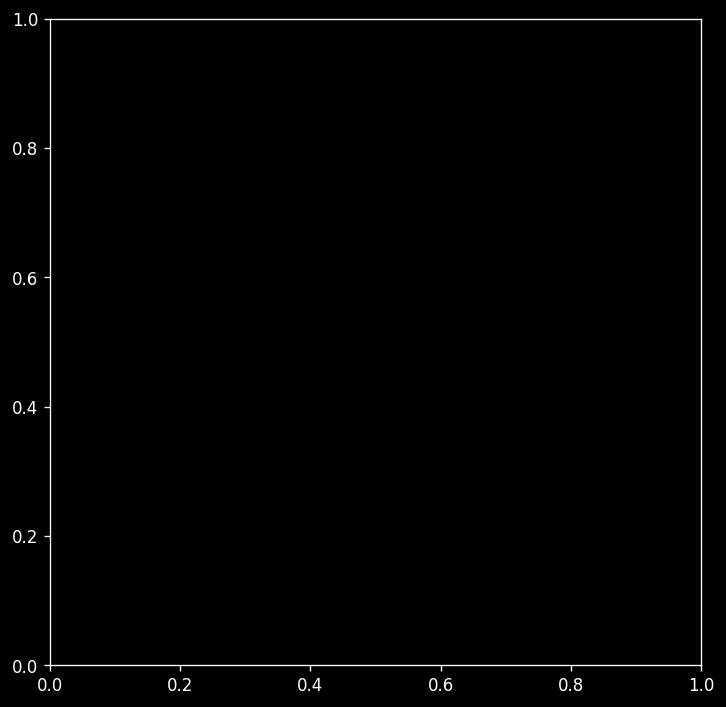

In [ ]:
plt.figure(figsize=(7,7), dpi=120)

plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel('mean sale price')

# Binning continuous variable

In [ ]:
len(data['Age of House (in Years)'].unique())

117

In [ ]:
data['Age of House (in Years)'].max()

118.0

In [ ]:
data['Age of House (in Years)'].min()

3.0

will there be any substantial difference between the selling of a house of age 40 year ant the selling price of another house of age 42 years, given that all the other features are exactly same?

*   no , two much diff of salling price of both of them
*    to reduce the redundancy if age<10 house new

*   if 10<age<50: the house is old
*   else the house is very old





In [ ]:
def age_of_house(x):
  if x<10:
    x='new'
  elif x<50:
    x='old'
  else:
    x='very old'
  return x

In [ ]:
cat_house_age=data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

binning of a continous variable results in loss of information

*   binning of a continuous variable results in an increase in the dimensionality of the dataset
*   List item



# FEATURE GENERATION
feature generation we will be covering the following :

*   Feature extraction
*   Combination of features



# Feature Extraction



In [ ]:
time =pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold']=time.year
data['month_sold']=time.month
# data['weekday_sold']=time.weekday_name
data['date_sold']=time.days_in_month

data[['year_sold', 'month_sold', 'date_sold']].head()


,year_sold,month_sold,date_sold
0,2017.0,10.0,31.0
1,2017.0,12.0,31.0
2,2016.0,2.0,29.0
3,2017.0,12.0,31.0
4,2016.0,2.0,29.0


weekday is very important in problems such as traffic prediction , food stock demand prediction etc.

# combination of features
in module three we use the luxury home .
why are we interested in defining this variable?

*   to make better predictions for the 'sale price' of the house.
*   q1. are the houses we got as 'luxury_home' really 'luxury'?



In [ ]:
luxury=data.pivot_table(values='Sale Price', columns='luxury_home', aggfunc='mean')
luxury
# recreate from the module 3
plt.figure(figsize=(5,5), dpi=120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury home')
plt.ylabel('Mean sale Price')

KeyError: ignored